Вариант 2
Лабораторная работа No8 'Работа с интерактивными блокнотами и
файлами'
Цели лабораторной работы:
1.Освоить работу с Excel-файлами средствами Python.
2.Научиться использовать библиотеку openpyxl для чтения и записи данных.
3.Научиться строить столбчатые диаграммы с помощью matplotlib.
4.Развить навыки обработки и визуализации табличных данных.

Задачи лабораторной работы:
1.Считать данные из Excel-файла с результатами студентов.
2.Выполнить вычисления (средние, максимальные, групповые показатели).
3.Построить столбчатые диаграммы по заданным вариантам.
4.Подписать оси, добавить заголовки и легенды к графикам.
5.Сохранить результаты и визуализации в Jupyter Notebook.

Ход работы:

1. Получаем из файла имена учашихся и их группы

In [17]:

import matplotlib.pyplot as plt
import openpyxl as pxl


wb = pxl.load_workbook("D:\не смотреть\мгкцт\Ипо\lr8\students.xlsx")

groups_sheet = wb['Группы']
groups_data = {}


for row in range(2, groups_sheet.max_row + 1):
    name = groups_sheet.cell(row=row, column=1).value
    group = groups_sheet.cell(row=row, column=2).value
    
    if name and group:
        groups_data[name] = group


grades_sheet = wb['Оценки']


group_scores = {}

<>:5: SyntaxWarning: invalid escape sequence '\l'
<>:5: SyntaxWarning: invalid escape sequence '\l'
C:\Users\yuliy\AppData\Local\Temp\ipykernel_9824\29284598.py:5: SyntaxWarning: invalid escape sequence '\l'
  wb = pxl.load_workbook("D:\не смотреть\мгкцт\Ипо\lr8\students.xlsx")


2.Обработка данных

In [18]:
for row in range(2, grades_sheet.max_row + 1):
    name = grades_sheet.cell(row=row, column=1).value
    
    if name in groups_data:
        group = groups_data[name]
        
     
        math = grades_sheet.cell(row=row, column=2).value
        physics = grades_sheet.cell(row=row, column=3).value
        informatics = grades_sheet.cell(row=row, column=4).value
        

        if all(isinstance(grade, (int, float)) for grade in [math, physics, informatics]):
            avg_score = (math + physics + informatics) / 3
            
            if group not in group_scores:
                group_scores[group] = []
            group_scores[group].append(avg_score)

3.Основной код, считающий средний балл: 

In [19]:
group_averages = {}
for group, scores in group_scores.items():
    group_averages[group] = sum(scores) / len(scores)


print("Средний балл по группам:")
for group in sorted(group_averages.keys()):
    print(f"Группа {group}: {group_averages[group]:.2f}")


Средний балл по группам:
Группа 100: 7.06
Группа 101: 7.29
Группа 102: 7.38
Группа 103: 6.81
Группа 104: 7.02


4.Построение изображения

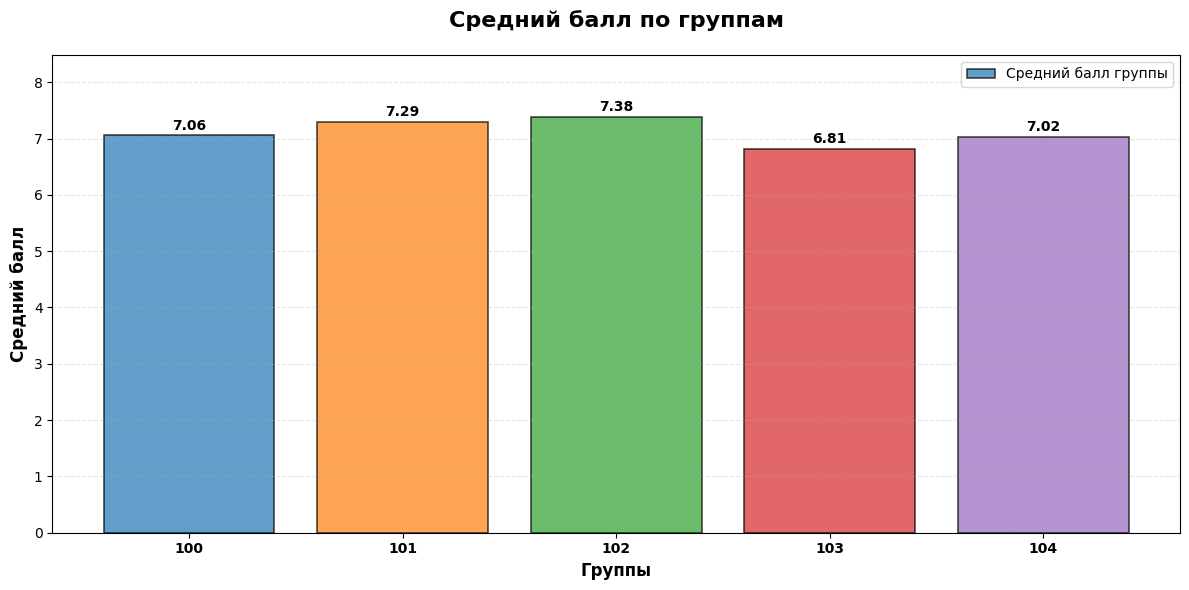

In [ ]:
plt.figure(figsize=(12, 6))


sorted_groups = sorted(group_averages.keys())
sorted_averages = [group_averages[group] for group in sorted_groups]


bars = plt.bar(sorted_groups, sorted_averages, 
               color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'],
               alpha=0.7, edgecolor='black', linewidth=1.2)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.05,
             f'{height:.2f}', ha='center', va='bottom', fontweight='bold')


plt.title('Средний балл по группам', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Группы', fontsize=12, fontweight='bold')
plt.ylabel('Средний балл', fontsize=12, fontweight='bold')
plt.legend(['Средний балл группы'], loc='upper right', frameon=True)

plt.grid(axis='y', alpha=0.3, linestyle='--')


plt.xticks(sorted_groups, fontweight='bold')
plt.ylim(0, max(sorted_averages) * 1.15)


5. Создание файла с результатами

In [ ]:
result_wb = pxl.Workbook()
result_ws = result_wb.active
result_ws.title = "Результаты"


result_ws['A1'] = "Группа"
result_ws['B1'] = "Средний балл"


row_num = 2
for group in sorted(group_averages.keys()):
    result_ws[f'A{row_num}'] = group
    result_ws[f'B{row_num}'] = group_averages[group]
    row_num += 1


result_wb.save("D:\не смотреть\мгкцт\Ипо\lr8\students_results.xlsx")
print(f"\nРезультаты сохранены в файл 'students_result.xlsx'")


Результаты сохранены в файл 'students_result.xlsx'


<>:17: SyntaxWarning: invalid escape sequence '\l'
<>:17: SyntaxWarning: invalid escape sequence '\l'
C:\Users\yuliy\AppData\Local\Temp\ipykernel_9824\1876645293.py:17: SyntaxWarning: invalid escape sequence '\l'
  result_wb.save("D:\не смотреть\мгкцт\Ипо\lr8\students_results.xlsx")


6. Построение изображения

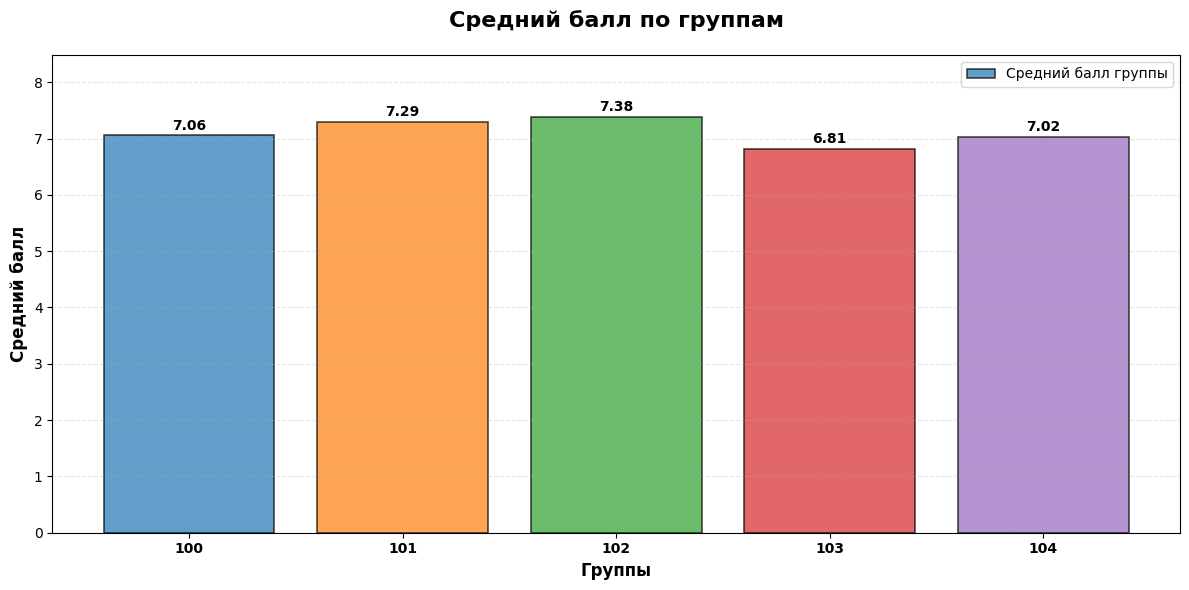

In [ ]:
plt.figure(figsize=(12, 6))


sorted_groups = sorted(group_averages.keys())
sorted_averages = [group_averages[group] for group in sorted_groups]


bars = plt.bar(sorted_groups, sorted_averages, 
               color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'],
               alpha=0.7, edgecolor='black', linewidth=1.2)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.05,
             f'{height:.2f}', ha='center', va='bottom', fontweight='bold')


plt.title('Средний балл по группам', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Группы', fontsize=12, fontweight='bold')
plt.ylabel('Средний балл', fontsize=12, fontweight='bold')
plt.legend(['Средний балл группы'], loc='upper right', frameon=True)


plt.grid(axis='y', alpha=0.3, linestyle='--')


plt.xticks(sorted_groups, fontweight='bold')
plt.ylim(0, max(sorted_averages) * 1.15)


plt.tight_layout()
plt.show()